In [5]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from src.data_handler import MNISTAdditionDataset
from src.visualization import plot_confusion_matrix
from src.plot_settings import set_publication_style

# Set plot style for publication quality
set_publication_style()

# Set random seed
seed = 42
np.random.seed(seed)

In [1]:
import sys
import os
sys.path.append('..')

from src.linear_classifier_analysis import LinearClassifierAnalyzer


# Initialize analyzer
analyzer = LinearClassifierAnalyzer(seed=42)

# Define training sizes to evaluate
train_sizes = [50, 100, 500, 1000]

# Run comparison
print("Running classifier comparison...")
results = analyzer.compare_classifiers(train_sizes)

# Print results
print("\nResults:")
print("-" * 50)
print(f"{'Training Size':<15} {'Joint':<10} {'Sequential':<10}")
print("-" * 50)
for i, size in enumerate(train_sizes):
    print(f"{size:<15} {results['joint'][i]:.4f}    {results['sequential'][i]:.4f}")

# Plot and save results
analyzer.plot_comparison(train_sizes, results, save_path='../report/images/linear_classifier_comparison.pdf')


NameError: name '__file__' is not defined

In [8]:
# Get the dataset
dataset = MNISTAdditionDataset(seed=seed)
data = dataset.create_datasets()

x_train, y_train = data['train'][0], data['train'][1]
x_val, y_val = data['val'][0], data['val'][1]
x_test, y_test = data['test'][0], data['test'][1]

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Print data shapes and ranges
print("Data shapes:")
print(f"Training images: {data['train'][0].shape}")
print(f"Training labels: {data['train'][1].shape}\n")
print("Data ranges:")
print(f"Training images: {data['train'][0].min()} to {data['train'][0].max()}")
print(f"Training labels: {data['train'][1].min()} to {data['train'][1].max()}\n")

Data shapes:
Training images: (50000, 28, 56)
Training labels: (50000,)

Data ranges:
Training images: 0.0 to 1.0
Training labels: 0 to 18



In [6]:
# Use the linear classifier (5 mins)
linear_classifier = LogisticRegression(multi_class='multinomial', penalty='l2', solver='sag', tol=0.01)
linear_classifier.fit(x_train_flat, y_train)

# Evaluate the linear classifier
y_pred = linear_classifier.predict(x_test_flat)
linear_accuracy = accuracy_score(y_test, y_pred)
print(f"Linear accuracy: {linear_accuracy:.4f}")

/Users/clementine/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy: 0.2227


In [9]:
# Transform (N, 28, 56) data into (2, N, 28, 28)
def split_images(data):
    N = data.shape[0]
    # Split each image into left and right halves (28x28 each)
    left_images = data[:, :, :28]
    right_images = data[:, :, 28:]
    # Stack left and right images into shape (2, N, 28, 28)
    return np.stack([left_images, right_images], axis=0)

# Transform training, validation and test sets
x_train_split = split_images(x_train)
x_val_split = split_images(x_val)
x_test_split = split_images(x_test)

# Verify the new shapes
print("New shapes:")
print(f"Training images: {x_train_split.shape}")  # Should be (2, 50000, 28, 28)
print(f"Validation images: {x_val_split.shape}")
print(f"Test images: {x_test_split.shape}")

New shapes:
Training images: (2, 50000, 28, 28)
Validation images: (2, 10000, 28, 28)
Test images: (2, 10000, 28, 28)


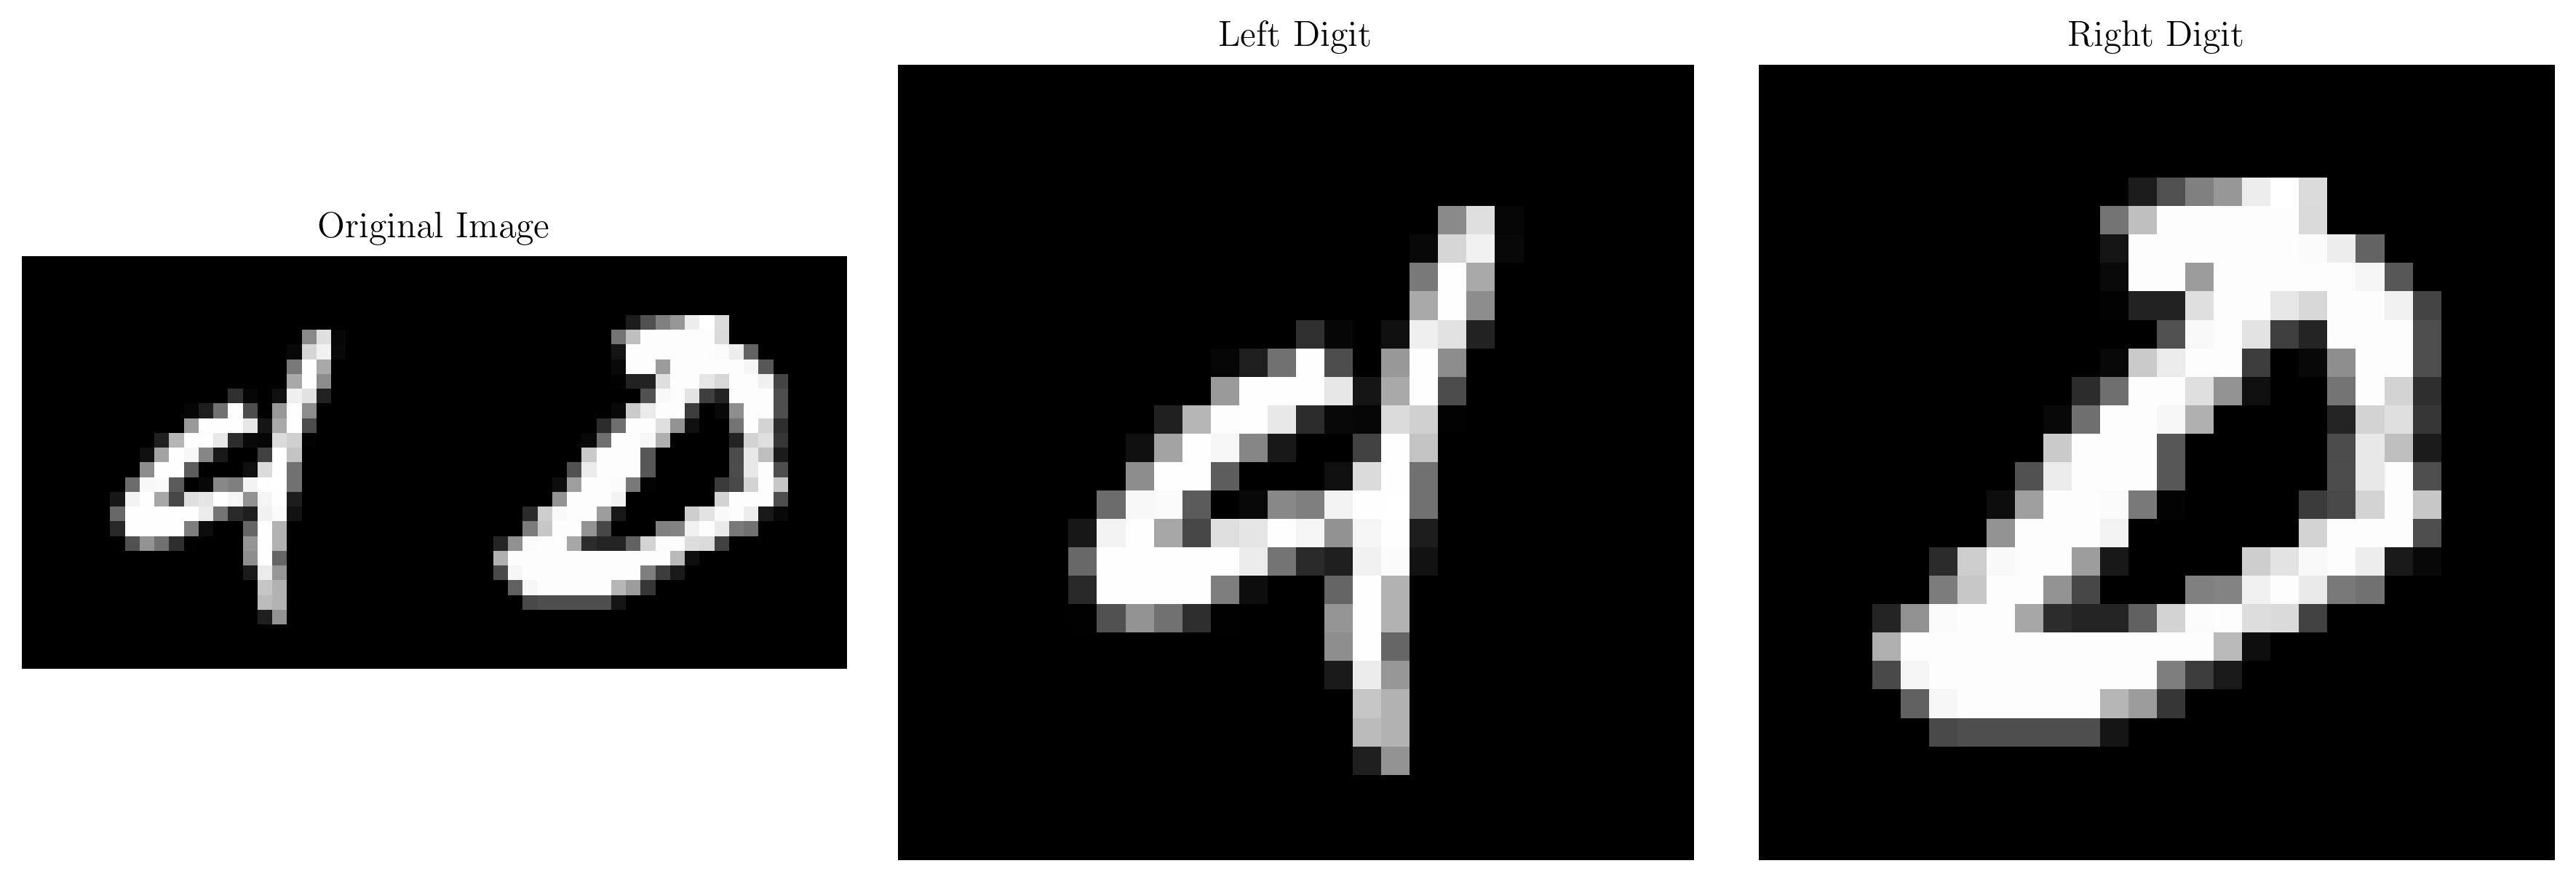

Label for this sample: 4


In [10]:
# Create a figure with 3 subplots: original image and two split digits
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Select a sample index
sample_idx = 0

# Display original image
ax1.imshow(x_train[sample_idx], cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# Display left digit
ax2.imshow(x_train_split[0][sample_idx], cmap='gray')
ax2.set_title('Left Digit')
ax2.axis('off')

# Display right digit
ax3.imshow(x_train_split[1][sample_idx], cmap='gray')
ax3.set_title('Right Digit')
ax3.axis('off')

plt.tight_layout()
plt.show()

# Print the label for this sample
print(f"Label for this sample: {y_train[sample_idx]}")

## Sequential Classifier

### Train a linear classifier for the single digit MNIST dataset

In [11]:
# Concatenate the two halves of the image to create a dataset of (N*2, 28, 28)
x_train_concat = np.concatenate([x_train_split[0], x_train_split[1]], axis=0)
y_train_concat = np.concatenate([y_train, y_train], axis=0)
x_train_concat_flat = x_train_concat.reshape(x_train_concat.shape[0], -1)
x_test_concat = np.concatenate([x_test_split[0], x_test_split[1]], axis=0)
y_test_concat = np.concatenate([y_test, y_test], axis=0)
x_test_concat_flat = x_test_concat.reshape(x_test_concat.shape[0], -1)


# Train a linear regression model for single digit MNIST dataset
linear_classifier_single = LogisticRegression(multi_class='multinomial', solver='sag', tol=0.01)
linear_classifier_single.fit(x_train_concat_flat, y_train_concat)

# Evaluate the linear classifier
y_pred = linear_classifier_single.predict(x_test_concat_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

/Users/clementine/anaconda3/envs/dis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Define the sequential classifier


In [ ]:
def sequential_classifier(x_test_split, linear_classifier_single):
    """Classifies pairs of MNIST digits by predicting their sum using a sequential approach.

    This classifier first predicts the probabilities of individual digits using a pre-trained
    single-digit classifier, then combines these probabilities to predict the sum of digit pairs.
    For each possible sum (0-18), it calculates the total probability by considering all possible
    digit combinations that could result in that sum.

    Args:
        x_test_split (numpy.ndarray): Split input images with shape (2, N, 28, 28), where:
            - First dimension: [0] for left digits, [1] for right digits
            - N is the number of samples
            - 28x28 is the image dimensions
        linear_classifier_single (sklearn.linear_model.LogisticRegression): Pre-trained logistic
            regression model for single digit classification (0-9)

    Returns:
        tuple:
            - predicted_sums (numpy.ndarray): Array of shape (N,) containing predicted sum values
              (0-18) for each input pair
            - sum_probs (numpy.ndarray): Array of shape (N, 19) containing probability
              distributions over all possible sums for each input pair

    Example:
        >>> # Assuming x_test_split contains test data and linear_classifier_single is trained
        >>> predictions, probabilities = sequential_classifier(x_test_split, linear_classifier_single)
        >>> accuracy = accuracy_score(y_test, predictions)
        >>> print(f"Accuracy: {accuracy:.4f}")

    Notes:
        - The function assumes input images are properly normalized and preprocessed
        - The pre-trained classifier should be trained on single MNIST digits (0-9)
        - Probability calculations consider all possible digit combinations (0-9) for each sum
    """
    # Get probabilities for left and right digits
    left_probs = linear_classifier_single.predict_proba(x_test_split[0].reshape(x_test_split.shape[1], -1))
    right_probs = linear_classifier_single.predict_proba(x_test_split[1].reshape(x_test_split.shape[1], -1))
    
    # Calculate final probabilities by multiplying corresponding probabilities
    n_samples = x_test_split.shape[1]
    sum_probs = np.zeros((n_samples, 19))  # 19 possible sums (0-18)

    for i in range(n_samples):
        # For each possible sum (0-18), multiply probabilities of digit combinations that sum to it
        for sum_val in range(19):
            prob = 0
            for d1 in range(10):
                for d2 in range(10):
                    if d1 + d2 == sum_val:
                        prob += left_probs[i][d1] * right_probs[i][d2]
            sum_probs[i, sum_val] = prob
            
    # Get the most likely sum for each sample
    predicted_sums = np.argmax(sum_probs, axis=1)
    
    return predicted_sums, sum_probs

sequential_predictions, sequential_probabilities = sequential_classifier(x_test_split, linear_classifier_single)
sequential_accuracy = accuracy_score(y_test, sequential_predictions)
print(f"Sequential accuracy: {sequential_accuracy:.4f}")
